In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('marketing_data.csv')
print(df.head())

   customer_id  annual_spending  frequency  campaign_success  churn
0            1          2185.43         24                 1      0
1            2          4778.21         11                 1      0
2            3          3793.97         49                 0      1
3            4          3193.96          8                 0      0
4            5          1202.08         36                 1      1


In [2]:
print(df.describe())

       customer_id  annual_spending   frequency  campaign_success       churn
count   200.000000       200.000000  200.000000        200.000000  200.000000
mean    100.500000      2678.028150   26.770000          0.475000    0.450000
std      57.879185      1327.011454   13.837067          0.500628    0.498742
min       1.000000       524.850000    1.000000          0.000000    0.000000
25%      50.750000      1528.620000   16.000000          0.000000    0.000000
50%     100.500000      2725.190000   28.000000          0.000000    0.000000
75%     150.250000      3905.867500   37.250000          1.000000    1.000000
max     200.000000      4940.990000   49.000000          1.000000    1.000000


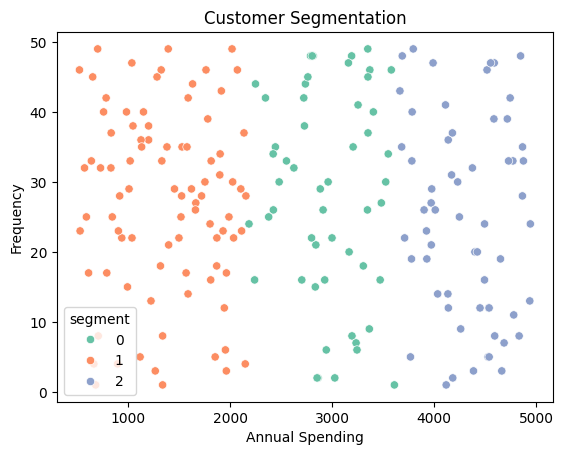

In [3]:
from sklearn.cluster import KMeans
X = df[['annual_spending', 'frequency']]
kmeans = KMeans(n_clusters=3)
df['segment'] = kmeans.fit_predict(X)
sns.scatterplot(x='annual_spending', y='frequency', hue='segment', data=df, palette='Set2')
plt.title("Customer Segmentation")
plt.xlabel("Annual Spending")
plt.ylabel("Frequency")
plt.show()

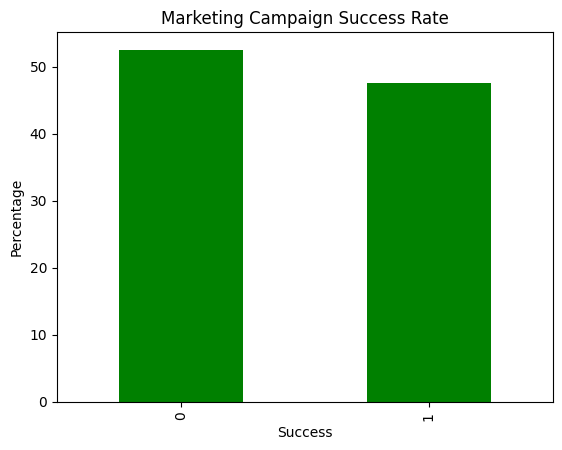

In [4]:
campaign_success_rate = df['campaign_success'].value_counts(normalize=True) * 100
campaign_success_rate.plot(kind='bar', color='green')
plt.title("Marketing Campaign Success Rate")
plt.xlabel("Success")
plt.ylabel("Percentage")
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X = df.drop('churn', axis=1) # Assuming 'churn' is the target column
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy of Churn Prediction Model:", accuracy_score(y_test, y_pred))

Accuracy of Churn Prediction Model: 0.575
